In [ ]:
pip install seaborn pandas matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

exp_json = "./experiment-20260211.json"

methods = ["bruteforce", "dfs", "hillclimb", "buildingwalk"]

df = pd.read_json(exp_json)
df.to_pickle("experiment.pickle")
df.to_csv("experiment-20260211.csv")
#print("Experiment:")
#print(df)

In [3]:
#df[(df["dist_weight"] == 0.0) and (df["radius"] == 50)]
df[(df["dist_weight"] == 1.0) & (df["radius"] == 50) & (df["method"] == "buildingwalk")].best_score.mean()

np.float64(1.720644744130573)

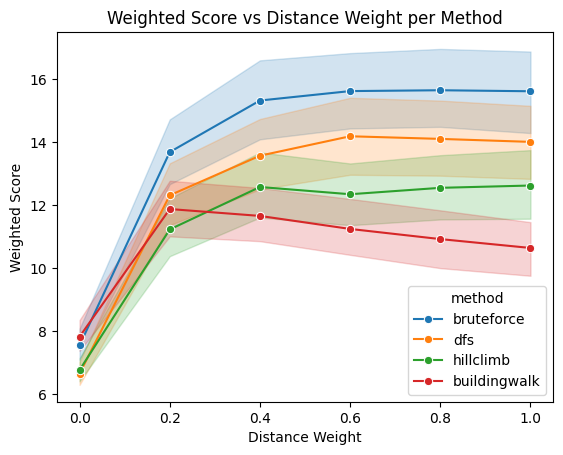

In [2]:
plt.figure()

sns.lineplot(
    data=df,
    x="dist_weight",
    y="weighted_score",
    hue="method",
    hue_order=methods,
    marker="o"
)

plt.xlabel("Distance Weight")
plt.ylabel("Weighted Score")
plt.title("Weighted Score vs Distance Weight per Method")
plt.show()

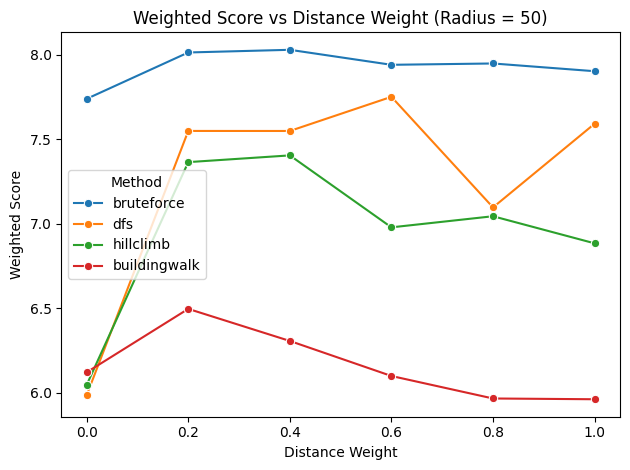

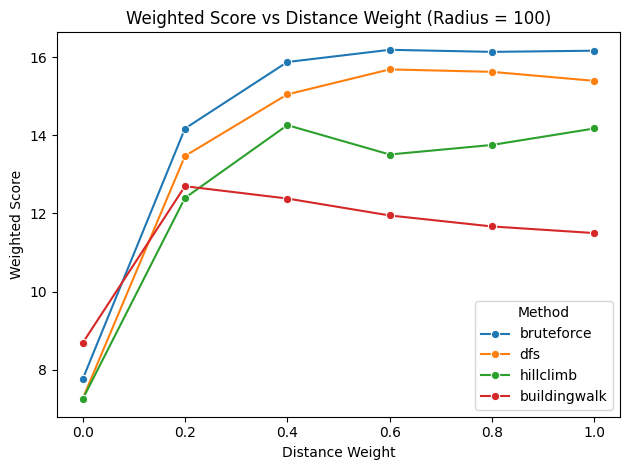

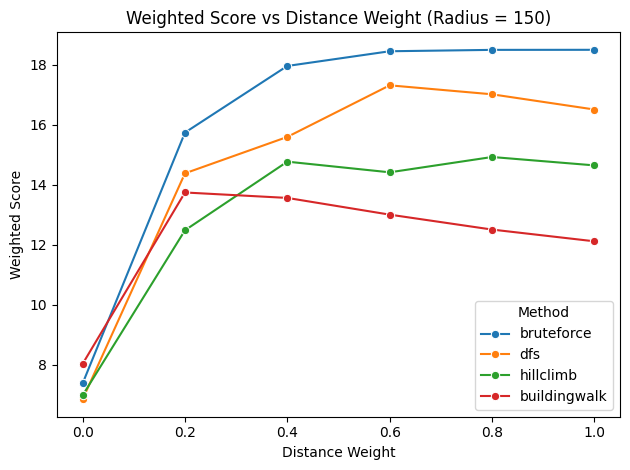

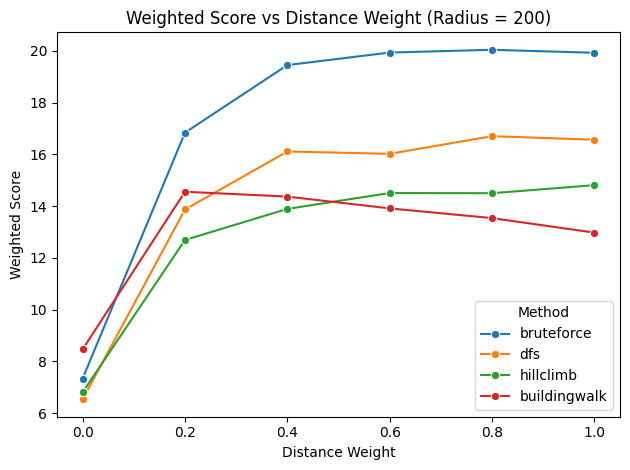

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

radii = sorted(df["radius"].unique())

for r in radii:
    plt.figure()
    
    subset = df[df["radius"] == r].sort_values(["method", "dist_weight"])
    
    sns.lineplot(
        data=subset,
        x="dist_weight",
        y="weighted_score",
        hue="method",
        hue_order=methods,
        marker="o",
        errorbar=None  # remove if you want CI bands
    )

    plt.xlabel("Distance Weight")
    plt.ylabel("Weighted Score")
    plt.title(f"Weighted Score vs Distance Weight (Radius = {r})")
    plt.legend(title="Method")
    plt.tight_layout()
    plt.show()


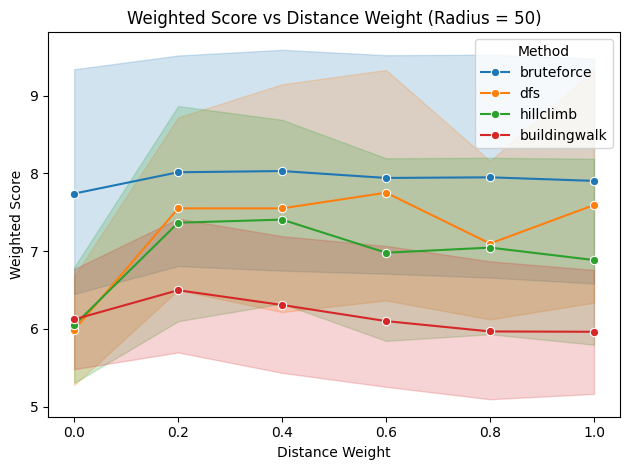

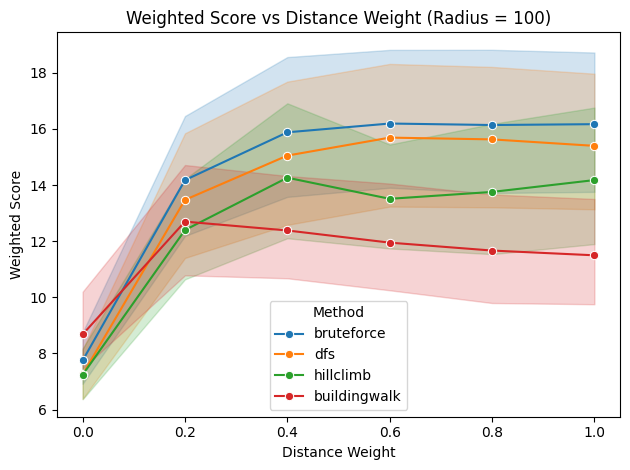

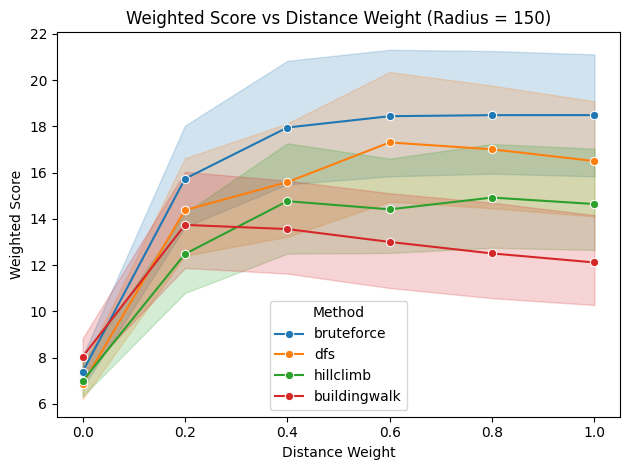

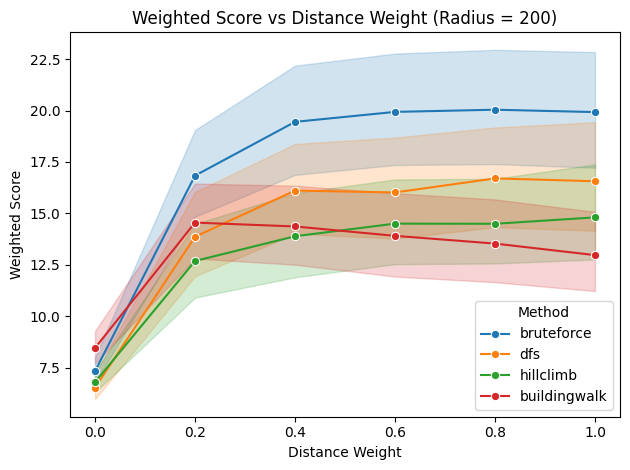

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import os 

radii = sorted(df["radius"].unique())

for r in radii:
    plt.figure()
    
    subset = df[df["radius"] == r].sort_values(["method", "dist_weight"])
    
    sns.lineplot(
        data=subset,
        x="dist_weight",
        y="weighted_score",
        hue="method",
        hue_order=methods,
        marker="o",
        #errorbar=None  # remove if you want CI bands
    )

    plt.xlabel("Distance Weight")
    plt.ylabel("Weighted Score")
    plt.title(f"Weighted Score vs Distance Weight (Radius = {r})")
    plt.legend(title="Method")
    plt.tight_layout()
    plt.savefig(os.path.join(f"{int(r)}.png"), dpi=300)
    plt.show()


In [35]:
#df[df["dist_weight"] == 1].groupby("method")["weighted_score"].mean()
# df[df["dist_weight"] == 0] \
#     .groupby(["radius", "method"])["weighted_score"] \
#     .mean() \
#     .sort_index()


# (
#     df[df["dist_weight"] == 1]
#       .groupby(["method", "radius"])["weighted_score"]
#       .mean()
#       .unstack("radius")
#       .round(2)
# )

methods_subset = ["bruteforce", "buildingwalk"]
radii_subset = [50, 200]

subset = df[
    (df["method"].isin(methods_subset)) &
    (df["radius"].isin(radii_subset))
]

# Group and aggregate
table = (
    subset.groupby(["radius", "dist_weight", "method"])
          .agg(
              mean_total_crimes=("total_crimes", "mean"),
              mean_seen_crimes=("seen_crimes", "mean")
          )
          .round(2)
          .reset_index()
          .sort_values(["radius", "dist_weight", "method"])
)

print(table)

    radius  dist_weight        method  mean_total_crimes  mean_seen_crimes
0       50          0.0    bruteforce              52.49             24.27
1       50          0.0  buildingwalk              52.49             17.89
2       50          0.2    bruteforce              52.49             20.68
3       50          0.2  buildingwalk              52.49             15.50
4       50          0.4    bruteforce              52.49             19.81
5       50          0.4  buildingwalk              52.49             14.88
6       50          0.6    bruteforce              52.49             19.37
7       50          0.6  buildingwalk              52.49             14.02
8       50          0.8    bruteforce              52.49             19.36
9       50          0.8  buildingwalk              52.49             13.77
10      50          1.0    bruteforce              52.49             19.29
11      50          1.0  buildingwalk              52.49             13.77
12     200          0.0  

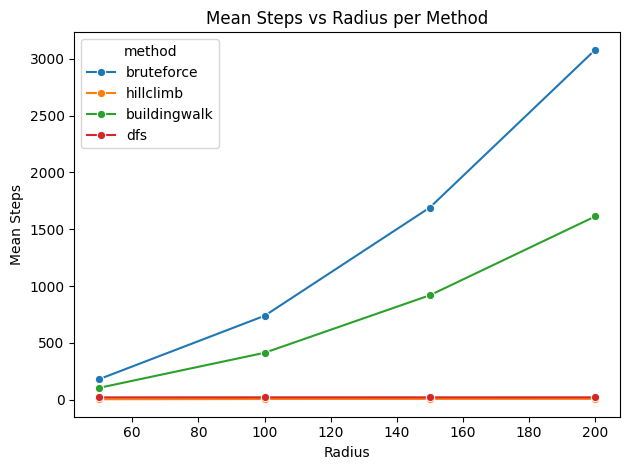

In [15]:
plt.figure()

sns.lineplot(
    data=df,
    x="radius",
    y="steps",
    hue="method",
    estimator="mean",   # this is default, but explicit is clearer
    errorbar=None,      # remove CI bands (optional)
    marker="o"
)

plt.xlabel("Radius")
plt.ylabel("Mean Steps")
plt.title("Mean Steps vs Radius per Method")
plt.tight_layout()
plt.show()

In [17]:
# mean_steps = (
#     df.groupby(["method", "radius"])["steps"]
#       .mean()
#       .reset_index()
#       .sort_values(["method", "radius"])
# )

# print(mean_steps)